# Imports

In [55]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw

from pprint import pprint
from probeinterface.plotting import plot_probe

# Loading data

In [13]:
global_job_kwargs = dict(n_jobs=1, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

In [15]:
local_path = si.download_dataset(remote_path="mearec/mearec_test_10s.h5")
recording, sorting_true = se.read_mearec(local_path)
print(recording)
print(sorting_true)

 modified: mearec\mearec_test_10s.h5 (file)
1 annex'd file (59.4 MB recorded total size)
MEArecRecordingExtractor: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                          float32 dtype - 39.06 MiB
  file_path: C:\Users\leofi\spikeinterface_datasets\ephy_testing_data\mearec\mearec_test_10s.h5
MEArecSortingExtractor: 10 units - 1 segments - 32.0kHz
  file_path: C:\Users\leofi\spikeinterface_datasets\ephy_testing_data\mearec\mearec_test_10s.h5


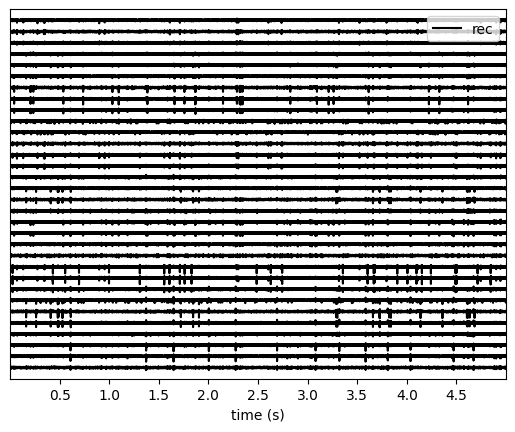

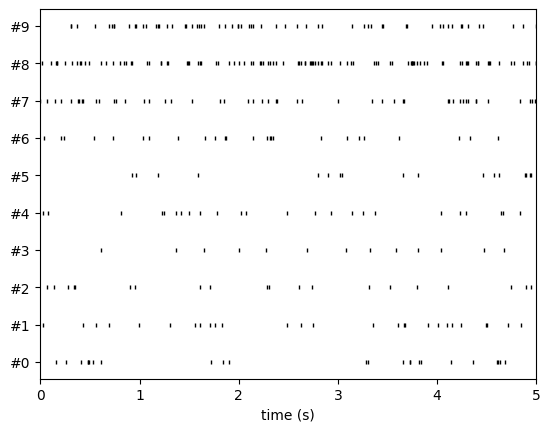

In [16]:
w_ts = sw.plot_traces(recording, time_range=(0, 5))
w_rs = sw.plot_rasters(sorting_true, time_range=(0, 5))

In [17]:
channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print("Channel ids:", channel_ids)
print("Sampling frequency:", fs)
print("Number of channels:", num_chan)
print("Number of segments:", num_seg)

Channel ids: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32']
Sampling frequency: 32000.0
Number of channels: 32
Number of segments: 1


Number of segments: 1
Unit ids: ['#0' '#1' '#2' '#3' '#4' '#5' '#6' '#7' '#8' '#9']
Spike train of first unit: [  5197   8413  13124  15420  15497  15668  16929  19607  55107  59060
  60958 105193 105569 117082 119243 119326 122293 122877 132413 139498
 147402 147682 148271 149857 165454 170569 174319 176237 183598 192278
 201535 217193 219715 221226 222967 223897 225338 243206 243775 248754
 253184 253308 265132 266197 266662 283149 284716 287592 304025 305286
 310438 310775 318460]


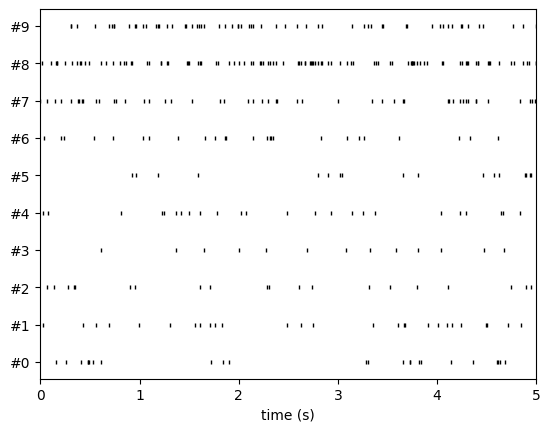

In [19]:
num_seg = recording.get_num_segments()
unit_ids = sorting_true.get_unit_ids()
spike_train = sorting_true.get_unit_spike_train(unit_id=unit_ids[0])

print("Number of segments:", num_seg)
print("Unit ids:", unit_ids)
print("Spike train of first unit:", spike_train)

w_rs = sw.plot_rasters(sorting_true, time_range=(0, 5))

Probe - 32ch - 1shanks


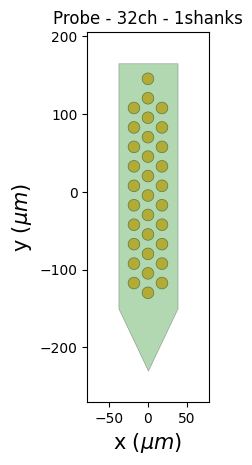

In [21]:
probe = recording.get_probe()
print(probe)

_ = plot_probe(probe)

In [23]:
recording_cmr = recording
recording_f = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
print(recording_f)
recording_cmr = spre.common_reference(recording_f, reference="global", operator="median")
print(recording_cmr)

# this computes and saves the recording after applying the preprocessing chain
recording_preprocessed = recording_cmr.save(format="binary")
print(recording_preprocessed)
print(recording)

BandpassFilterRecording: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                         float32 dtype - 39.06 MiB
CommonReferenceRecording: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                          float32 dtype - 39.06 MiB
Use cache_folder=C:\Users\leofi\AppData\Local\Temp\spikeinterface_cache\tmp1dgz6pvm\N79JV3WY
write_binary_recording 
n_jobs=1 - samples_per_chunk=32,000 - chunk_memory=3.91 MiB - total_memory=3.91 MiB - chunk_duration=1.00s


write_binary_recording:   0%|          | 0/10 [00:00<?, ?it/s]

BinaryFolderRecording: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                       float32 dtype - 39.06 MiB
MEArecRecordingExtractor: 32 channels - 32.0kHz - 1 segments - 320,000 samples - 10.00s 
                          float32 dtype - 39.06 MiB
  file_path: C:\Users\leofi\spikeinterface_datasets\ephy_testing_data\mearec\mearec_test_10s.h5


# Spike sorting

In [24]:
print("Available sorters", ss.available_sorters())
print("Installed sorters", ss.installed_sorters())

Available sorters ['combinato', 'hdsort', 'herdingspikes', 'ironclust', 'kilosort', 'kilosort2', 'kilosort2_5', 'kilosort3', 'kilosort4', 'klusta', 'mountainsort4', 'mountainsort5', 'pykilosort', 'simple', 'spykingcircus', 'spykingcircus2', 'tridesclous', 'tridesclous2', 'waveclus', 'waveclus_snippets', 'yass']
Installed sorters ['simple', 'spykingcircus2', 'tridesclous', 'tridesclous2']


In [25]:
print("Tridesclous params:")
pprint(ss.get_default_sorter_params("tridesclous"))
print("SpykingCircus2 params:")
pprint(ss.get_default_sorter_params("spykingcircus2"))

Tridesclous params:
{'chunk_duration': '1s',
 'common_ref_removal': False,
 'detect_sign': -1,
 'detect_threshold': 5,
 'freq_max': 5000.0,
 'freq_min': 400.0,
 'max_threads_per_process': 1,
 'mp_context': None,
 'n_jobs': 1,
 'nested_params': None,
 'progress_bar': True}
SpykingCircus2 params:
{'apply_motion_correction': True,
 'apply_preprocessing': True,
 'cache_preprocessing': {'delete_cache': True,
                         'memory_limit': 0.5,
                         'mode': 'memory'},
 'clustering': {'legacy': True},
 'debug': False,
 'detection': {'detect_threshold': 4, 'peak_sign': 'neg'},
 'filtering': {'filter_order': 2,
               'freq_max': 7000,
               'freq_min': 150,
               'ftype': 'bessel'},
 'general': {'ms_after': 2, 'ms_before': 2, 'radius_um': 100},
 'job_kwargs': {'n_jobs': 0.8},
 'matched_filtering': True,
 'matching': {'method': 'wobble'},
 'merging': {'auto_merge': {'corr_diff_thresh': 0.25, 'min_spikes': 10},
             'correlograms_kw

In [26]:
sorting_TDC = ss.run_sorter(sorter_name="tridesclous", recording=recording_preprocessed, detect_threshold=4)
print(sorting_TDC)

TridesclousSortingExtractor: 10 units - 1 segments - 32.0kHz


In [28]:
other_params = ss.get_default_sorter_params("tridesclous")
other_params["detect_threshold"] = 6

# parameters set by params dictionary
sorting_TDC_2 = ss.run_sorter(
    sorter_name="tridesclous", recording=recording_preprocessed, folder="tdc_output2", **other_params
)
print(sorting_TDC_2)

ValueError: Folder C:\Academics\NYU\Neuroinformatics lab\lfp\region_decoding\script\tdc_output2 already exists

In [35]:
print("Units found by tridesclous:", sorting_TDC.get_unit_ids())

Units found by tridesclous: [0 1 2 3 4 5 6 7 8 9]


In [39]:
analyzer_TDC = si.create_sorting_analyzer(sorting=sorting_TDC, recording=recording_preprocessed, format='binary_folder', folder='analyzer_TDC_binary')
print(analyzer_TDC)

estimate_sparsity:   0%|          | 0/10 [00:00<?, ?it/s]

C:\ProgramData\miniconda3\envs\lfp\lib\site-packages\spikeinterface\core\basesorting.py:264: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


SortingAnalyzer: 32 channels - 10 units - 1 segments - binary_folder - sparse - has recording
Loaded 0 extensions


In [40]:
analyzer_TDC.compute("random_spikes")
analyzer_TDC.compute("waveforms")

compute_waveforms:   0%|          | 0/10 [00:00<?, ?it/s]

In [44]:
analyzer_TDC.compute("noise_levels")
analyzer_TDC.compute("templates")
analyzer_TDC.compute("spike_amplitudes")

spike_amplitudes:   0%|          | 0/10 [00:00<?, ?it/s]

In [45]:
analyzer_TDC.compute("unit_locations", method="center_of_mass")
analyzer_TDC.compute("spike_locations", ms_before=0.5)
analyzer_TDC.compute("correlograms", bin_ms=0.1)
analyzer_TDC.compute("template_similarity", method="cosine_similarity")

spike_locations:   0%|          | 0/10 [00:00<?, ?it/s]

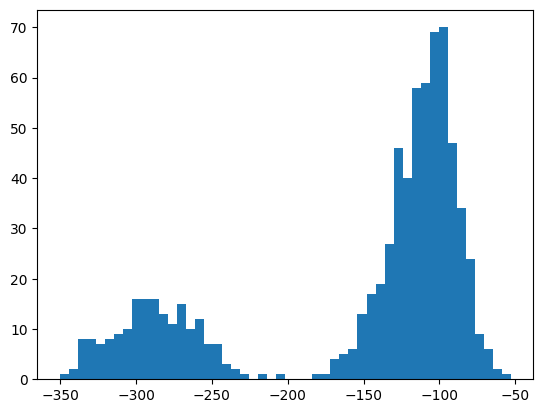

In [47]:
amplitudes = analyzer_TDC.get_extension("spike_amplitudes").get_data()
plt.hist(amplitudes, bins=50)
plt.show()

# LFP Band Extraction

In [54]:
recording, sorting = se.toy_example(num_channels=4, duration=10, seed=0)

In [57]:
recording_bp = spre.bandpass_filter(recording, freq_min=300, freq_max=6000)
recording_notch = spre.notch_filter(recording, freq=1000, q=10)

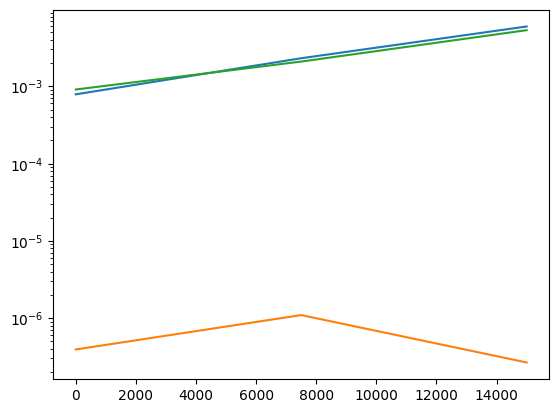

In [75]:
f_raw, p_raw = scipy.signal.welch(recording.get_traces(0), fs=recording.get_sampling_frequency())
f_bp, p_bp = scipy.signal.welch(recording_bp.get_traces(0), fs=recording.get_sampling_frequency())
f_notch, p_notch = scipy.signal.welch(recording_notch.get_traces(0), fs=recording.get_sampling_frequency())

fig, ax = plt.subplots()
ax.semilogy(f_raw, p_raw[0], f_bp, p_bp[0], f_notch, p_notch[0])

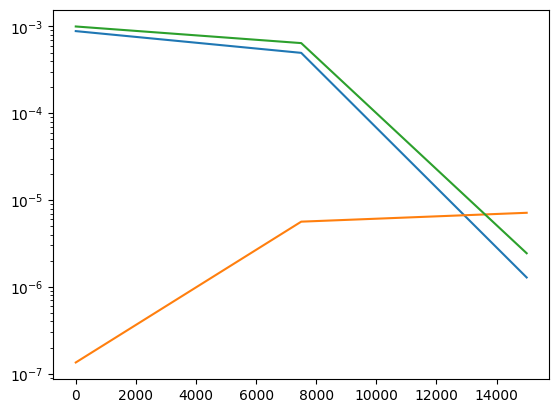

In [80]:
f_raw, p_raw = scipy.signal.welch(recording.get_traces(1), fs=recording.get_sampling_frequency())
f_bp, p_bp = scipy.signal.welch(recording_bp.get_traces(1), fs=recording.get_sampling_frequency())
f_notch, p_notch = scipy.signal.welch(recording_notch.get_traces(1), fs=recording.get_sampling_frequency())

fig, ax = plt.subplots()
ax.semilogy(f_raw, p_raw[0], f_bp, p_bp[0], f_notch, p_notch[0])

In [76]:
recording_lfp = spre.bandpass_filter(recording, freq_min=1, freq_max=300)
recording_lfp = spre.resample(recording_lfp, 1000)
recording_mua = spre.resample(spre.rectify(recording), 1000)

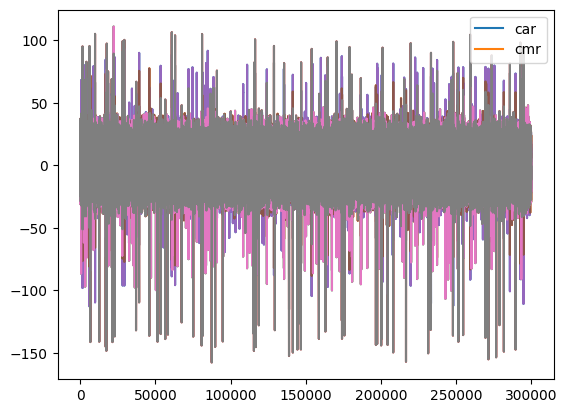

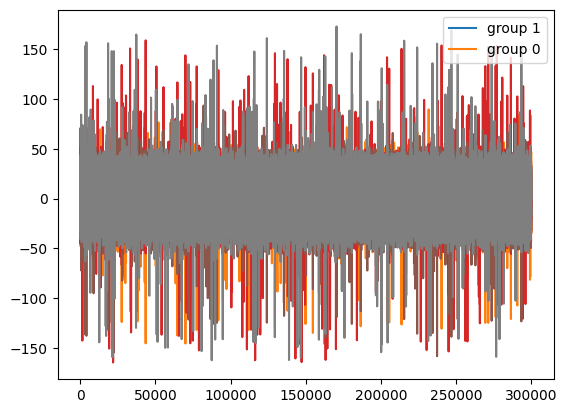

In [90]:
recording_car = spre.common_reference(recording, reference='global')
recording_cmr = spre.common_reference(recording, reference='global')
recording_single = spre.common_reference(recording, reference='single', ref_channel_ids=[0])
recording_single_groups = spre.common_reference(recording, reference='single', groups=[[0, 1], [2, 3]], ref_channel_ids=[0, 2])


fig1, ax1 = plt.subplots()
ax1.plot(recording_car.get_traces(0))
ax1.plot(recording_cmr.get_traces(0))

fig2, ax2 = plt.subplots()
ax2.plot(recording_single_groups.get_traces(1))  # not zero
ax2.plot(recording_single_groups.get_traces(0))

ax1.legend(['car', 'cmr'])
ax2.legend(['group 1', 'group 0'])

In [92]:
recording_remove_bad = spre.detect_bad_channels(recording)
print(recording_remove_bad)

(array([], dtype=int32), array(['good', 'good', 'good', 'good'], dtype='<U5'))


In [99]:
# Number of segments
num_seg = recording.get_num_segments()
print("Number of segments:", num_seg)

Number of segments: 2


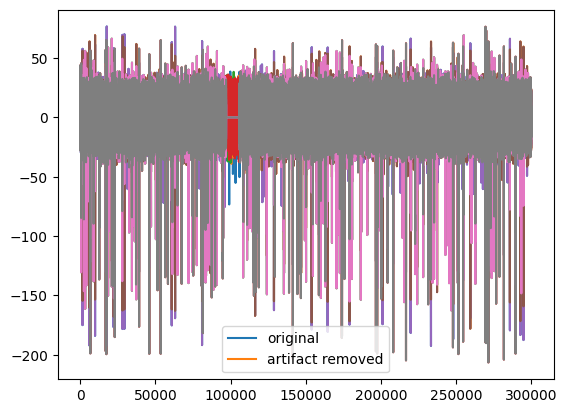

In [105]:
# create dummy stimulation triggers
stimulation_trigger_frames = [[100000, 500000], [700000, 900000]]

# large ms_before and s_after are used for plotting only
recording_rmartifact = spre.remove_artifacts(recording,
                                                         list_triggers=stimulation_trigger_frames,
                                                         ms_before=100, ms_after=200)

fig3, ax3 = plt.subplots()
ax3.plot(recording.get_traces(0))
ax3.plot(recording_rmartifact.get_traces(0))
ax3.legend(['original', 'artifact removed'])